## Creating and running the CNN or HQNN models on the plant leaves dataset

CNN/HQNN setup: Code in hybrid_nn.py. Core features are:
- 2 CNN layers with batch normalization followed by pooling 
- 2 fully connected linear layers for the classical route
- Linear layer -> quantum layer -> linear layer for the hybrid-quantum route
- Base parameters like learning rate, batch size, etc. are pre-defined in config.yml
- The network was set up to be simple enough to allow the incorporation of a quantum layer to significantly impact the model's capability to learn patterns in the dataset. 

<br>

Training algorithm: See model_setup.py for the code. Core features are:
- CrossEntropyLoss for classifying multiple leaf categories
- Batch processing followed by accuracy metrics per epoch on the entire train and test data
- Learning rate scheduling (starts high and reduces by half every step_size=10 epochs)
- Gradient clipping to prevent exploding gradients common in hybrid-quantum setups
- Early stopping from trainig plateaus or nearing overfitting when training accuracy reaches above 99.5%

<br>

Wrapper function build_and_run_nn()
- Classical CNN - pass None for qubit_count and quantum_layer_args
- HQNN with a quantum layer - include the above arguments

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from cudaq import spin
from src.model_builder import build_and_run_nn

### Classical CNN notes:

Datset size: The dataset is not large (~1500 samples for the 5 leaf labels chosen in config.yml). 
- These 5 leaves were chosen as they were the most visually distinct and differences between them could be captured by this relatively simple CNN setup. 
- However, with this few of samples, the CNN tends to memorize the dataset. Dropout, batch normalization, & limiting the number of linear neurons help significantly to reduce overfitting.
- A larger data set would be better, but the purpose of this is to test if a HQNN reaches similar results to the CNN
    - And if so, how complex does the quantum layer's kernel & hamiltonians need to be?

In [ ]:
# Run the wrapper function to load augmented dataset & run CNN/HQNN

# Classical ex.
result = build_and_run_nn('categories', 
                          conv_channels_1=32, conv_channels_2=64, 
                          fc_neurons_1=128, fc_neurons_2=64, 
                          qubit_count=None, quantum_layer_args=None)

Number of classes 5
Y values (tensor(0), tensor(4))

Epoch 0, Learning Rate: 0.0001


epoch 0: 100%|██████████| 30/30 [00:06<00:00,  4.31batch/s, acc=0.471, loss=1.32]


Training accuracy (all samples) = 0.434
Test accuracy = 0.453

Epoch 1, Learning Rate: 0.0001


epoch 1: 100%|██████████| 30/30 [00:07<00:00,  4.15batch/s, acc=0.706, loss=0.631]


Training accuracy (all samples) = 0.724
Test accuracy = 0.688

Epoch 2, Learning Rate: 0.0001


epoch 2: 100%|██████████| 30/30 [00:07<00:00,  4.12batch/s, acc=0.882, loss=0.192]


Training accuracy (all samples) = 0.923
Test accuracy = 0.835

Epoch 3, Learning Rate: 0.0001


epoch 3: 100%|██████████| 30/30 [00:07<00:00,  3.94batch/s, acc=0.882, loss=0.23]


Training accuracy (all samples) = 0.956
Test accuracy = 0.857

Epoch 4, Learning Rate: 0.0001


epoch 4: 100%|██████████| 30/30 [00:07<00:00,  4.11batch/s, acc=0.765, loss=0.334]


Training accuracy (all samples) = 0.970
Test accuracy = 0.870

Epoch 5, Learning Rate: 0.0001


epoch 5: 100%|██████████| 30/30 [00:07<00:00,  3.95batch/s, acc=0.882, loss=0.287]


Training accuracy (all samples) = 0.980
Test accuracy = 0.868

Epoch 6, Learning Rate: 0.0001


epoch 6: 100%|██████████| 30/30 [00:07<00:00,  4.17batch/s, acc=0.941, loss=0.224]


Training accuracy (all samples) = 0.980
Test accuracy = 0.876

Epoch 7, Learning Rate: 0.0001


epoch 7: 100%|██████████| 30/30 [00:07<00:00,  4.03batch/s, acc=0.882, loss=0.287]


Training accuracy (all samples) = 0.983
Test accuracy = 0.884

Epoch 8, Learning Rate: 0.0001


epoch 8: 100%|██████████| 30/30 [00:07<00:00,  4.07batch/s, acc=1, loss=0.0544]  


Training accuracy (all samples) = 0.983
Test accuracy = 0.878

Epoch 9, Learning Rate: 0.0001


epoch 9: 100%|██████████| 30/30 [00:07<00:00,  4.09batch/s, acc=0.882, loss=0.404]


Training accuracy (all samples) = 0.984
Test accuracy = 0.871

Epoch 10, Learning Rate: 5e-05


epoch 10: 100%|██████████| 30/30 [00:07<00:00,  4.08batch/s, acc=0.882, loss=0.605]


Training accuracy (all samples) = 0.988
Test accuracy = 0.870

Epoch 11, Learning Rate: 5e-05


epoch 11: 100%|██████████| 30/30 [00:07<00:00,  4.07batch/s, acc=0.765, loss=0.515]


Training accuracy (all samples) = 0.990
Test accuracy = 0.876

Epoch 12, Learning Rate: 5e-05


epoch 12: 100%|██████████| 30/30 [00:07<00:00,  4.06batch/s, acc=1, loss=0.0123]   


Training accuracy (all samples) = 0.991
Test accuracy = 0.881

Epoch 13, Learning Rate: 5e-05


epoch 13: 100%|██████████| 30/30 [00:07<00:00,  3.92batch/s, acc=0.941, loss=0.124]


Training accuracy (all samples) = 0.993
Test accuracy = 0.886

Epoch 14, Learning Rate: 5e-05


epoch 14: 100%|██████████| 30/30 [00:07<00:00,  3.99batch/s, acc=0.824, loss=0.205]


Training accuracy (all samples) = 0.995
Test accuracy = 0.878

Epoch 15, Learning Rate: 5e-05


epoch 15: 100%|██████████| 30/30 [00:07<00:00,  4.09batch/s, acc=0.824, loss=0.627]


Training accuracy (all samples) = 0.995
Test accuracy = 0.887

Epoch 16, Learning Rate: 5e-05


epoch 16: 100%|██████████| 30/30 [00:07<00:00,  4.01batch/s, acc=0.941, loss=0.12] 


Training accuracy (all samples) = 0.995
Test accuracy = 0.887

Epoch 17, Learning Rate: 5e-05


epoch 17: 100%|██████████| 30/30 [00:07<00:00,  3.98batch/s, acc=1, loss=0.0383]   


Training accuracy (all samples) = 0.993
Test accuracy = 0.881

Epoch 18, Learning Rate: 5e-05


epoch 18: 100%|██████████| 30/30 [00:07<00:00,  4.16batch/s, acc=0.941, loss=0.0832]


Training accuracy (all samples) = 0.993
Test accuracy = 0.882

Epoch 19, Learning Rate: 5e-05


epoch 19: 100%|██████████| 30/30 [00:07<00:00,  4.08batch/s, acc=0.824, loss=0.619]


Training accuracy (all samples) = 0.995
Test accuracy = 0.874

Early stopping at epoch 19, training accuracy > 99.5%.
Saved neural network fitting results and model to ./data/traditional_nn_1744913895


HybridNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=161280, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc_out): Linear(in_features=64, out_features=5, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


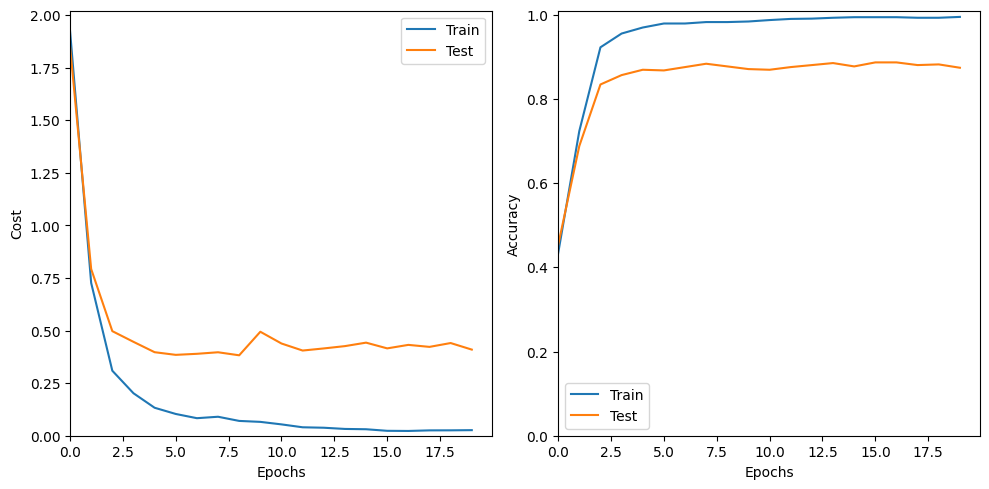

In [2]:
file_name = result[-1]
print(result[-2])

df = pd.read_csv(file_name + '.csv')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['training_cost'], label='Train')
plt.plot(df['testing_cost'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(1, 2, 2)
plt.plot(df['training_accuracy'], label='Train')
plt.plot(df['testing_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,)
plt.ylim(0,1.01)

plt.tight_layout()
plt.show()

### HQNN notes (work-in-progress)
- qubits are initialized, angle encoded, and then entangled
    - entangling after encoding allows for feature mixing
- training in early epochs is quite noisy, which is expcted as small shifts in input parameters into the quantum layer can drastically impact expectation value outputs
- gradients are non-zero and flowing through the quantum circuit, however:
    - the current combination of hamiltonians & quantum kernel is not expressive enough to adapt to 5 classes, resulting in an early plateau with a loss ~1.6 which is expected selecting 1 of the 5 classes at random

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cudaq
from cudaq import spin
from src.model_builder import build_and_run_nn
from src.utils.model_utils.quantum_layer import QuantumFunction

quantum_layer = {
    'hamiltonians': [spin.z(0) * spin.x(0), 
                     spin.z(1) * spin.x(1), 
                     spin.z(2) * spin.x(2), 
                     spin.z(3) * spin.x(3), 
                     spin.z(4) * spin.x(4)],

    'shift': torch.tensor(torch.pi / 4),
    'quantum_param_init_scale': 1,
    'features_per_qubit': 2,
    'n_classes': 5}

qf = QuantumFunction(5, quantum_layer.get('hamiltonians'), quantum_layer.get('features_per_qubit'))
ry_ex = np.array([0.1,0.2,0.3,0.4,0.5])
rx_ex = np.array([0.1,0.2,0.3,0.4,0.5])

print(cudaq.draw(qf.kernel, ry_ex, rx_ex))



     ╭─────────╮╭─────────╮                    
q0 : ┤ ry(0.1) ├┤ rx(0.1) ├──●────●────●────●──
     ├─────────┤├─────────┤╭─┴─╮  │    │    │  
q1 : ┤ ry(0.2) ├┤ rx(0.2) ├┤ x ├──┼────┼────┼──
     ├─────────┤├─────────┤╰───╯╭─┴─╮  │    │  
q2 : ┤ ry(0.3) ├┤ rx(0.3) ├─────┤ x ├──┼────┼──
     ├─────────┤├─────────┤     ╰───╯╭─┴─╮  │  
q3 : ┤ ry(0.4) ├┤ rx(0.4) ├──────────┤ x ├──┼──
     ├─────────┤├─────────┤          ╰───╯╭─┴─╮
q4 : ┤ ry(0.5) ├┤ rx(0.5) ├───────────────┤ x ├
     ╰─────────╯╰─────────╯               ╰───╯



In [2]:
# Quantum ex.
result = build_and_run_nn('categories', 
                          conv_channels_1=32, conv_channels_2=64, 
                          fc_neurons_1=256, fc_neurons_2=0, 
                          qubit_count=5, quantum_layer_args=quantum_layer)

Number of classes 5
Y values (tensor(0), tensor(4))

Epoch 0, Learning Rate: 0.01


epoch 0: 100%|██████████| 15/15 [00:30<00:00,  2.01s/batch, acc=0.239, loss=1.61]


Training accuracy (all samples) = 0.204
Test accuracy = 0.215

Epoch 1, Learning Rate: 0.01


epoch 1: 100%|██████████| 15/15 [00:30<00:00,  2.01s/batch, acc=0.239, loss=1.58]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 2, Learning Rate: 0.01


epoch 2: 100%|██████████| 15/15 [00:30<00:00,  2.03s/batch, acc=0.194, loss=1.56]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 3, Learning Rate: 0.01


epoch 3: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.194, loss=1.56]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 4, Learning Rate: 0.01


epoch 4: 100%|██████████| 15/15 [00:31<00:00,  2.08s/batch, acc=0.194, loss=1.56]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 5, Learning Rate: 0.01


epoch 5: 100%|██████████| 15/15 [00:31<00:00,  2.07s/batch, acc=0.194, loss=1.56]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 6, Learning Rate: 0.01


epoch 6: 100%|██████████| 15/15 [00:30<00:00,  2.03s/batch, acc=0.194, loss=1.56]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 7, Learning Rate: 0.01


epoch 7: 100%|██████████| 15/15 [00:30<00:00,  2.03s/batch, acc=0.194, loss=1.56]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 8, Learning Rate: 0.01


epoch 8: 100%|██████████| 15/15 [00:29<00:00,  2.00s/batch, acc=0.194, loss=1.56]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 9, Learning Rate: 0.01


epoch 9: 100%|██████████| 15/15 [00:31<00:00,  2.07s/batch, acc=0.194, loss=1.56]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 10, Learning Rate: 0.005


epoch 10: 100%|██████████| 15/15 [00:30<00:00,  2.04s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 11, Learning Rate: 0.005


epoch 11: 100%|██████████| 15/15 [00:30<00:00,  2.06s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 12, Learning Rate: 0.005


epoch 12: 100%|██████████| 15/15 [00:30<00:00,  2.06s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 13, Learning Rate: 0.005


epoch 13: 100%|██████████| 15/15 [00:30<00:00,  2.04s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 14, Learning Rate: 0.005


epoch 14: 100%|██████████| 15/15 [00:30<00:00,  2.03s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 15, Learning Rate: 0.005


epoch 15: 100%|██████████| 15/15 [00:30<00:00,  2.05s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 16, Learning Rate: 0.005


epoch 16: 100%|██████████| 15/15 [00:30<00:00,  2.04s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 17, Learning Rate: 0.005


epoch 17: 100%|██████████| 15/15 [00:30<00:00,  2.02s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 18, Learning Rate: 0.005


epoch 18: 100%|██████████| 15/15 [00:30<00:00,  2.03s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 19, Learning Rate: 0.005


epoch 19: 100%|██████████| 15/15 [00:30<00:00,  2.04s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 20, Learning Rate: 0.0025


epoch 20: 100%|██████████| 15/15 [00:29<00:00,  1.95s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 21, Learning Rate: 0.0025


epoch 21: 100%|██████████| 15/15 [00:29<00:00,  1.95s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 22, Learning Rate: 0.0025


epoch 22: 100%|██████████| 15/15 [00:29<00:00,  1.97s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 23, Learning Rate: 0.0025


epoch 23: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 24, Learning Rate: 0.0025


epoch 24: 100%|██████████| 15/15 [00:30<00:00,  2.04s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 25, Learning Rate: 0.0025


epoch 25: 100%|██████████| 15/15 [00:30<00:00,  2.01s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Epoch 26, Learning Rate: 0.0025


epoch 26: 100%|██████████| 15/15 [00:31<00:00,  2.07s/batch, acc=0.194, loss=1.57]


Training accuracy (all samples) = 0.260
Test accuracy = 0.280

Early stopping at epoch 26 due to training accuracy plateau.
Saved neural network fitting results and model to ./data/hybrid_quantum_nn_1744921927


HybridNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=161280, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (quantum): QuantumLayer()
  (fc_out): Linear(in_features=5, out_features=5, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


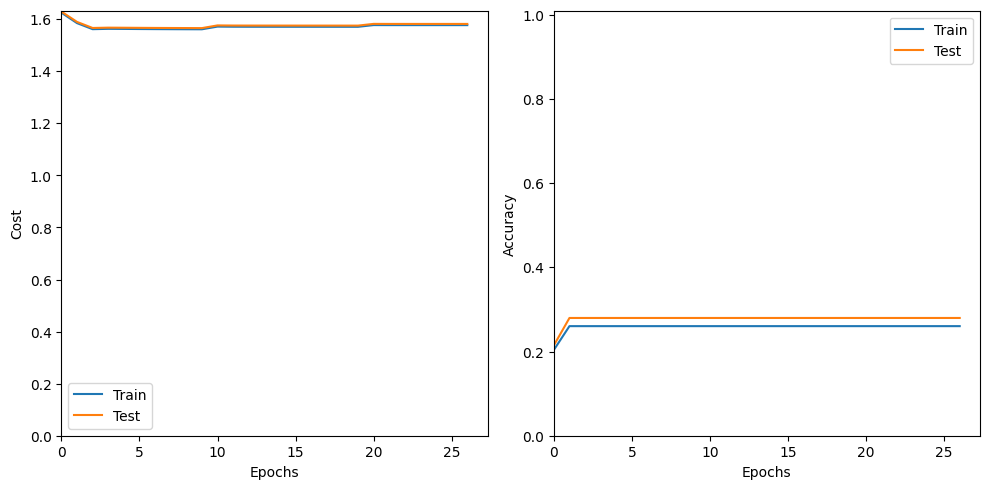

In [3]:
file_name = result[-1]
print(result[-2])

df = pd.read_csv(file_name + '.csv')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['training_cost'], label='Train')
plt.plot(df['testing_cost'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(1, 2, 2)
plt.plot(df['training_accuracy'], label='Train')
plt.plot(df['testing_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,)
plt.ylim(0,1.01)

plt.tight_layout()
plt.show()